In [28]:
data[1]

array([  1, 109,  26,  88], dtype=int64)

In [12]:
import xml.etree.ElementTree as ET
import numpy as np

# Parse the XML file
tree = ET.parse(r"C:\Users\USER\Downloads\Coins detection.v5i.voc\valid\L1010446_JPG.rf.f77b7af834cd2f9cd3733ef137915450.xml")
root = tree.getroot()

# Initialize an empty list to store bounding box coordinates
bounding_boxes = []

# Iterate over each object element
for obj in root.findall('object'):
    # Extract the bounding box coordinates
    xmin = int(obj.find('bndbox').find('xmin').text)
    xmax = int(obj.find('bndbox').find('xmax').text)
    ymin = int(obj.find('bndbox').find('ymin').text)
    ymax = int(obj.find('bndbox').find('ymax').text)
    
    # Append the bounding box coordinates to the list
    bounding_boxes.append([xmin, ymin, xmax, ymax])

# Convert the list of bounding box coordinates to a NumPy array
bounding_boxes_array = np.array(bounding_boxes)

# Print the NumPy array containing bounding box coordinates
print(bounding_boxes_array)


[[2382 1125 3112 1866]
 [3780 1065 4425 1707]
 [2507 2377 2973 2851]
 [3764 2287 4215 2742]
 [4780 1790 5231 2241]]


In [48]:
import os
import xml.etree.ElementTree as ET
import numpy as np

# Function to extract bounding box coordinates from a single XML file
def extract_bounding_boxes_from_xml(xml_file):
    # Parse the XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Initialize an empty list to store bounding box coordinates
    bounding_boxes = []

    # Iterate over each object element
    for obj in root.findall('object'):
        # Extract the bounding box coordinates
        xmin = int(obj.find('bndbox').find('xmin').text)
        xmax = int(obj.find('bndbox').find('xmax').text)
        ymin = int(obj.find('bndbox').find('ymin').text)
        ymax = int(obj.find('bndbox').find('ymax').text)

        # Append the bounding box coordinates to the list
        bounding_boxes.append([xmin, ymin, xmax, ymax])

    # Convert the list of bounding box coordinates to a NumPy array
    bounding_boxes_array = np.array(bounding_boxes)
    
    return bounding_boxes_array

# Path to the folder containing XML files
folder_path = r"C:\Users\USER\Downloads\Coins detection.v5i.voc\entire_dataset"

# Initialize an empty list to store bounding box arrays for all XML files
bounding_boxes_all_files = []

for filename in sorted(os.listdir(folder_path)):
    if filename.endswith('.xml'):
        xml_file_path = os.path.join(folder_path, filename)
        bounding_boxes_array = extract_bounding_boxes_from_xml(xml_file_path)
        bounding_boxes_all_files.append(bounding_boxes_array)

#np.save(r"C:\Users\USER\Documents\Training_coins\bounding_boxes.npy", bounding_boxes_all_files)

# Concatenate bounding box arrays from all XML files into a single NumPy array
#bounding_boxes_combined = np.concatenate(bounding_boxes_all_files, axis=0)

# Print the combined NumPy array containing bounding box coordinates
print(bounding_boxes_all_files[0].shape)


(5, 4)


In [49]:
bounding_boxes_all_files[0]

array([[3128, 2890, 3700, 3465],
       [1915, 2999, 2442, 3527],
       [2600, 2382, 3129, 2914],
       [1736, 1691, 2474, 2434],
       [3071, 1386, 3677, 1998]])

In [68]:
import dlib
import cv2
# In this dictionary our images and annotations will be stored.
data = {}
directory = r"C:\Users\USER\Downloads\Coins detection.v5i.voc\entire_dataset - Copie"

# List of image files with the 'jpg' extension
image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg')]

# Custom sorting function to sort filenames based on their numeric values
def sort_by_numeric_value(filename):
    return int(os.path.splitext(filename)[0])

# Sort the image files based on their numeric values
image_files_sorted = sorted(image_files, key=sort_by_numeric_value)

print(image_files_sorted)
image_indexes = [int(os.path.splitext(img_name)[0]) for img_name in image_files_sorted if img_name.split('.')[0].isdigit()]

print("index:", image_indexes)

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg']
index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5

In [74]:
bounding_boxes_all_files[0]

array([[3128, 2890, 3700, 3465],
       [1915, 2999, 2442, 3527],
       [2600, 2382, 3129, 2914],
       [1736, 1691, 2474, 2434],
       [3071, 1386, 3677, 1998]])

In [75]:
import dlib
import cv2
# In this dictionary our images and annotations will be stored.
data = {}
directory = r"C:\Users\USER\Downloads\Coins detection.v5i.voc\entire_dataset - Copie"

# List of image files with the 'jpg' extension
image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg')]

# Custom sorting function to sort filenames based on their numeric values
def sort_by_numeric_value(filename):
    return int(os.path.splitext(filename)[0])

# Sort the image files based on their numeric values
image_files_sorted = sorted(image_files, key=sort_by_numeric_value)

image_indexes = [int(os.path.splitext(img_name)[0]) for img_name in image_files_sorted if img_name.split('.')[0].isdigit()]

print("index:", image_indexes)
# Shuffle the indexes to have random train/test split later on.
#np.random.shuffle(image_indexes)

# Open and read the content of the boxes.txt file
box_dict = bounding_boxes_all_files

# Loop over all indexes
for index in image_indexes:
    
    # Read the image in memmory and append it to the list
    img = cv2.imread(os.path.join(directory, str(index) + '.jpg'))    
    
    # Read the associated bounding_box
    bounding_box = box_dict[index]
    #print(bounding_box)
    
    dlib_box = []
    for box in bounding_box:
    # Convert the bounding box to dlib format
        #print("box:", box)
        x1, y1, x2, y2  = box
        dlib_box.append(dlib.rectangle(left=x1 , top=y1, right=x2, bottom=y2))
    
    # Store the image and the box together
    data[index] = (img, dlib_box)

index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


In [76]:
data[0][1]

[rectangle(3128,2890,3700,3465),
 rectangle(1915,2999,2442,3527),
 rectangle(2600,2382,3129,2914),
 rectangle(1736,1691,2474,2434),
 rectangle(3071,1386,3677,1998)]

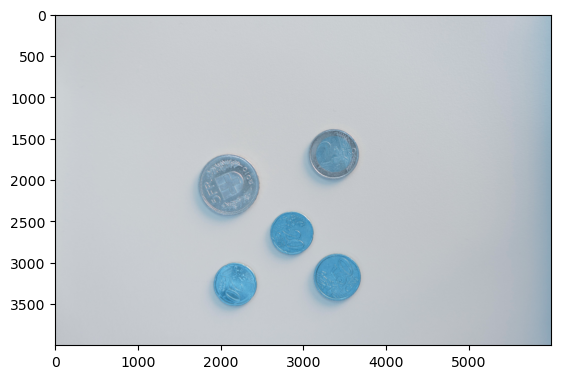

In [77]:
plt.imshow(data[0][0])

In [85]:
a = [1,2,4]
b = a.copy()
b

[1, 2, 4]

C:\Users\USER\AppData\Local\Temp\ipykernel_6764\638593509.py:7: UserWarning: you are shuffling a 'dict' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(data)


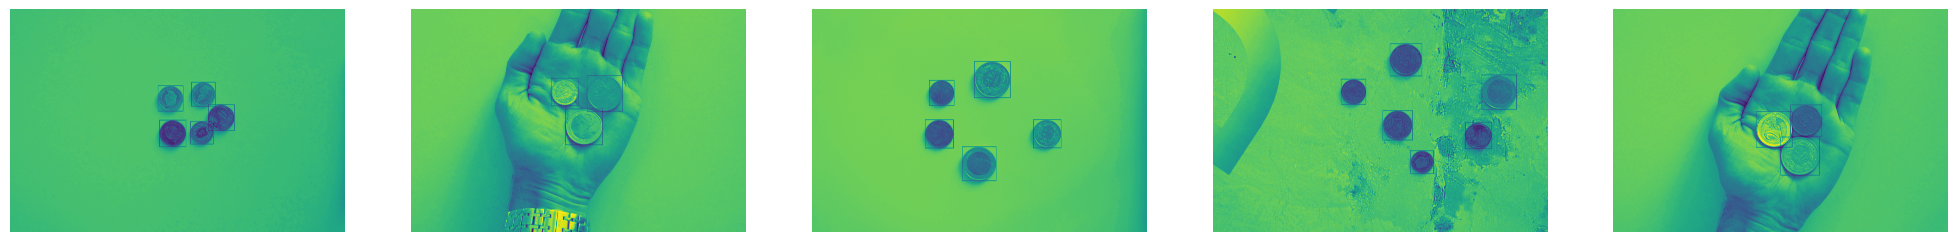

In [86]:
import matplotlib.pyplot as plt
no_of_samples = 10

image_names = os.listdir(directory)

data_ = data.copy()
np.random.shuffle(data)

# Extract the subset of boxes
#subset = data[][:no_of_samples ]

cols = 5

# Given the number of samples to display, what's the number of rows required.
rows = int(np.ceil(5 / cols))

# Set the figure size
plt.figure(figsize=(cols*cols, rows*cols))

#Loop for each class
for i in range(5):
        left = []
        right = []
        top = []
        bottom = []
        # Extract the bonding box coordinates
        for box in data[i][1]:
                d_box = box
                #left, top, right,bottom = d_box.left(), d_box.top(), d_box.right(), d_box.bottom()
                left.append(d_box.left())
                top.append(d_box.top())
                right.append(d_box.right())
                bottom.append(d_box.bottom())
        
        # Get the image
        image = data[i][0]
        
        # Draw reectangle on the detected hand
        for l, t, r, b in zip(left, top, right, bottom):
                cv2.rectangle(image, (l, t), (r, b), (0, 255, 0), 3)
        
        #plt.imshow(image)
        # Display the image
        plt.subplot(rows,cols,i+1);plt.imshow(image[:,:,::5]);plt.axis('off');

In [44]:
import os

# Path to the folder containing image and XML files
folder_path = r"C:\Users\USER\Downloads\Coins detection.v5i.voc\entire_dataset - Copie"

# Get a list of all image files in the folder, sorted for consistency
image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])

# Iterate over each file and rename it along with its corresponding XML file
for index, image_filename in enumerate(image_files, start=0):
    # Get the file extension of the image file
    file_extension = os.path.splitext(image_filename)[1]
    
    # Create the new filename for the image and XML files
    new_base_filename = f"{index}"
    new_image_filename = f"{new_base_filename}{file_extension}"
    new_xml_filename = f"{new_base_filename}.xml"
    
    # Construct full file paths for the image file
    old_image_file_path = os.path.join(folder_path, image_filename)
    new_image_file_path = os.path.join(folder_path, new_image_filename)
    
    # Rename the image file
    os.rename(old_image_file_path, new_image_file_path)
    
    # Construct full file paths for the corresponding XML file
    old_xml_file_path = os.path.join(folder_path, os.path.splitext(image_filename)[0] + '.xml')
    new_xml_file_path = os.path.join(folder_path, new_xml_filename)
    
    # Check if the corresponding XML file exists and rename it
    if os.path.exists(old_xml_file_path):
        os.rename(old_xml_file_path, new_xml_file_path)
    
    print(f"Renamed '{image_filename}' to '{new_image_filename}' and corresponding XML to '{new_xml_filename}'")

print("Renaming complete.")


Renamed 'L1010277_JPG.rf.04dc9cc4f5b38fb7029fee7f721f122a.jpg' to '0.jpg' and corresponding XML to '0.xml'
Renamed 'L1010279_JPG.rf.14ec81fb0457ea54a5960e5b1f6a3966.jpg' to '1.jpg' and corresponding XML to '1.xml'
Renamed 'L1010281_JPG.rf.c5a4468a285686379aae5f0bedb81a1a.jpg' to '2.jpg' and corresponding XML to '2.xml'
Renamed 'L1010283_JPG.rf.dd8b171cf07f49f3353ecc000b3d99b5.jpg' to '3.jpg' and corresponding XML to '3.xml'
Renamed 'L1010287_JPG.rf.d77d47d9fd236e2136e63d2da4a11d28.jpg' to '4.jpg' and corresponding XML to '4.xml'
Renamed 'L1010288_JPG.rf.969458dc712cc2e6a038bf45cdbe941c.jpg' to '5.jpg' and corresponding XML to '5.xml'
Renamed 'L1010294_JPG.rf.a6cb24fe0a53112a63ab2e48c38e0af0.jpg' to '6.jpg' and corresponding XML to '6.xml'
Renamed 'L1010297_JPG.rf.815ecc37db130544756e117914d45092.jpg' to '7.jpg' and corresponding XML to '7.xml'
Renamed 'L1010298_JPG.rf.ab39c94a180de131dfc9edaa5bc70dc3.jpg' to '8.jpg' and corresponding XML to '8.xml'
Renamed 'L1010300_JPG.rf.42128d9704af

In [87]:
#Training 
import time
# This is the percentage of data we will use to train
# The rest will be used for testing
percent = 0.8

# How many examples make 80%.
split = int(len(data) * percent)

# Seperate the images and bounding boxes in different lists.
images = [tuple_value[0] for tuple_value in data.values()]
bounding_boxes = [tuple_value[1] for tuple_value in data.values()]



In [90]:
# Initialize object detector Options
options = dlib.simple_object_detector_training_options()

# I'm disabling the horizontal flipping, becauase it confuses the detector if you're training on few examples
# By doing this the detector will only detect left or right hand (whichever you trained on). 
options.add_left_right_image_flips = False

# Set the c parameter of SVM equal to 5
# A bigger C encourages the model to better fit the training data, it can lead to overfitting.
# So set an optimal C value via trail and error.
options.C = 5

# Note the start time before training.
st = time.time()

# You can start the training now
detector = dlib.train_simple_object_detector(images[:split], bounding_boxes[:split], options)

# Print the Total time taken to train the detector
print('Training Completed, Total Time taken: {:.2f} seconds'.format(time.time() - st))

Training Completed, Total Time taken: 975.96 seconds


In [ ]:
file_name = 'Coin_Detector.svm'
detector.save(file_name)

In [ ]:
win_det = dlib.image_window()
win_det.set_image(detector)

In [ ]:
print("Training Metrics: {}".format(dlib.test_simple_object_detector(images[:split], bounding_boxes[:split], detector)))
print("Testing accuracy: {}".format(dlib.test_simple_object_detector(images[split:], bounding_boxes[split:], detector)))

In [ ]:
detector = dlib.train_simple_object_detector(images, bounding_boxes, options)
detector.save(file_name)

In [28]:
import cv2
import os

# Path to the folder containing image files
folder_path = r"C:\Users\USER\Documents\Dataset_coins\test"

# List of image files with common extensions
image_extensions = ['.jpg']

im_total = []

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image file
    if any(filename.lower().endswith(ext) for ext in image_extensions):
        # Construct the full path to the image file
        image_path = os.path.join(folder_path, filename)
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)

        im_total.append(image)

In [3]:
import dlib
file_name = r"C:\Users\USER\Documents\Dataset_coins\Coin_Detector.svm"
detector = dlib.simple_object_detector(file_name)


In [25]:
test_sets = im_total[141:162]
detector_test = []

for im in test_sets:
    detector_test.append(detector(im))

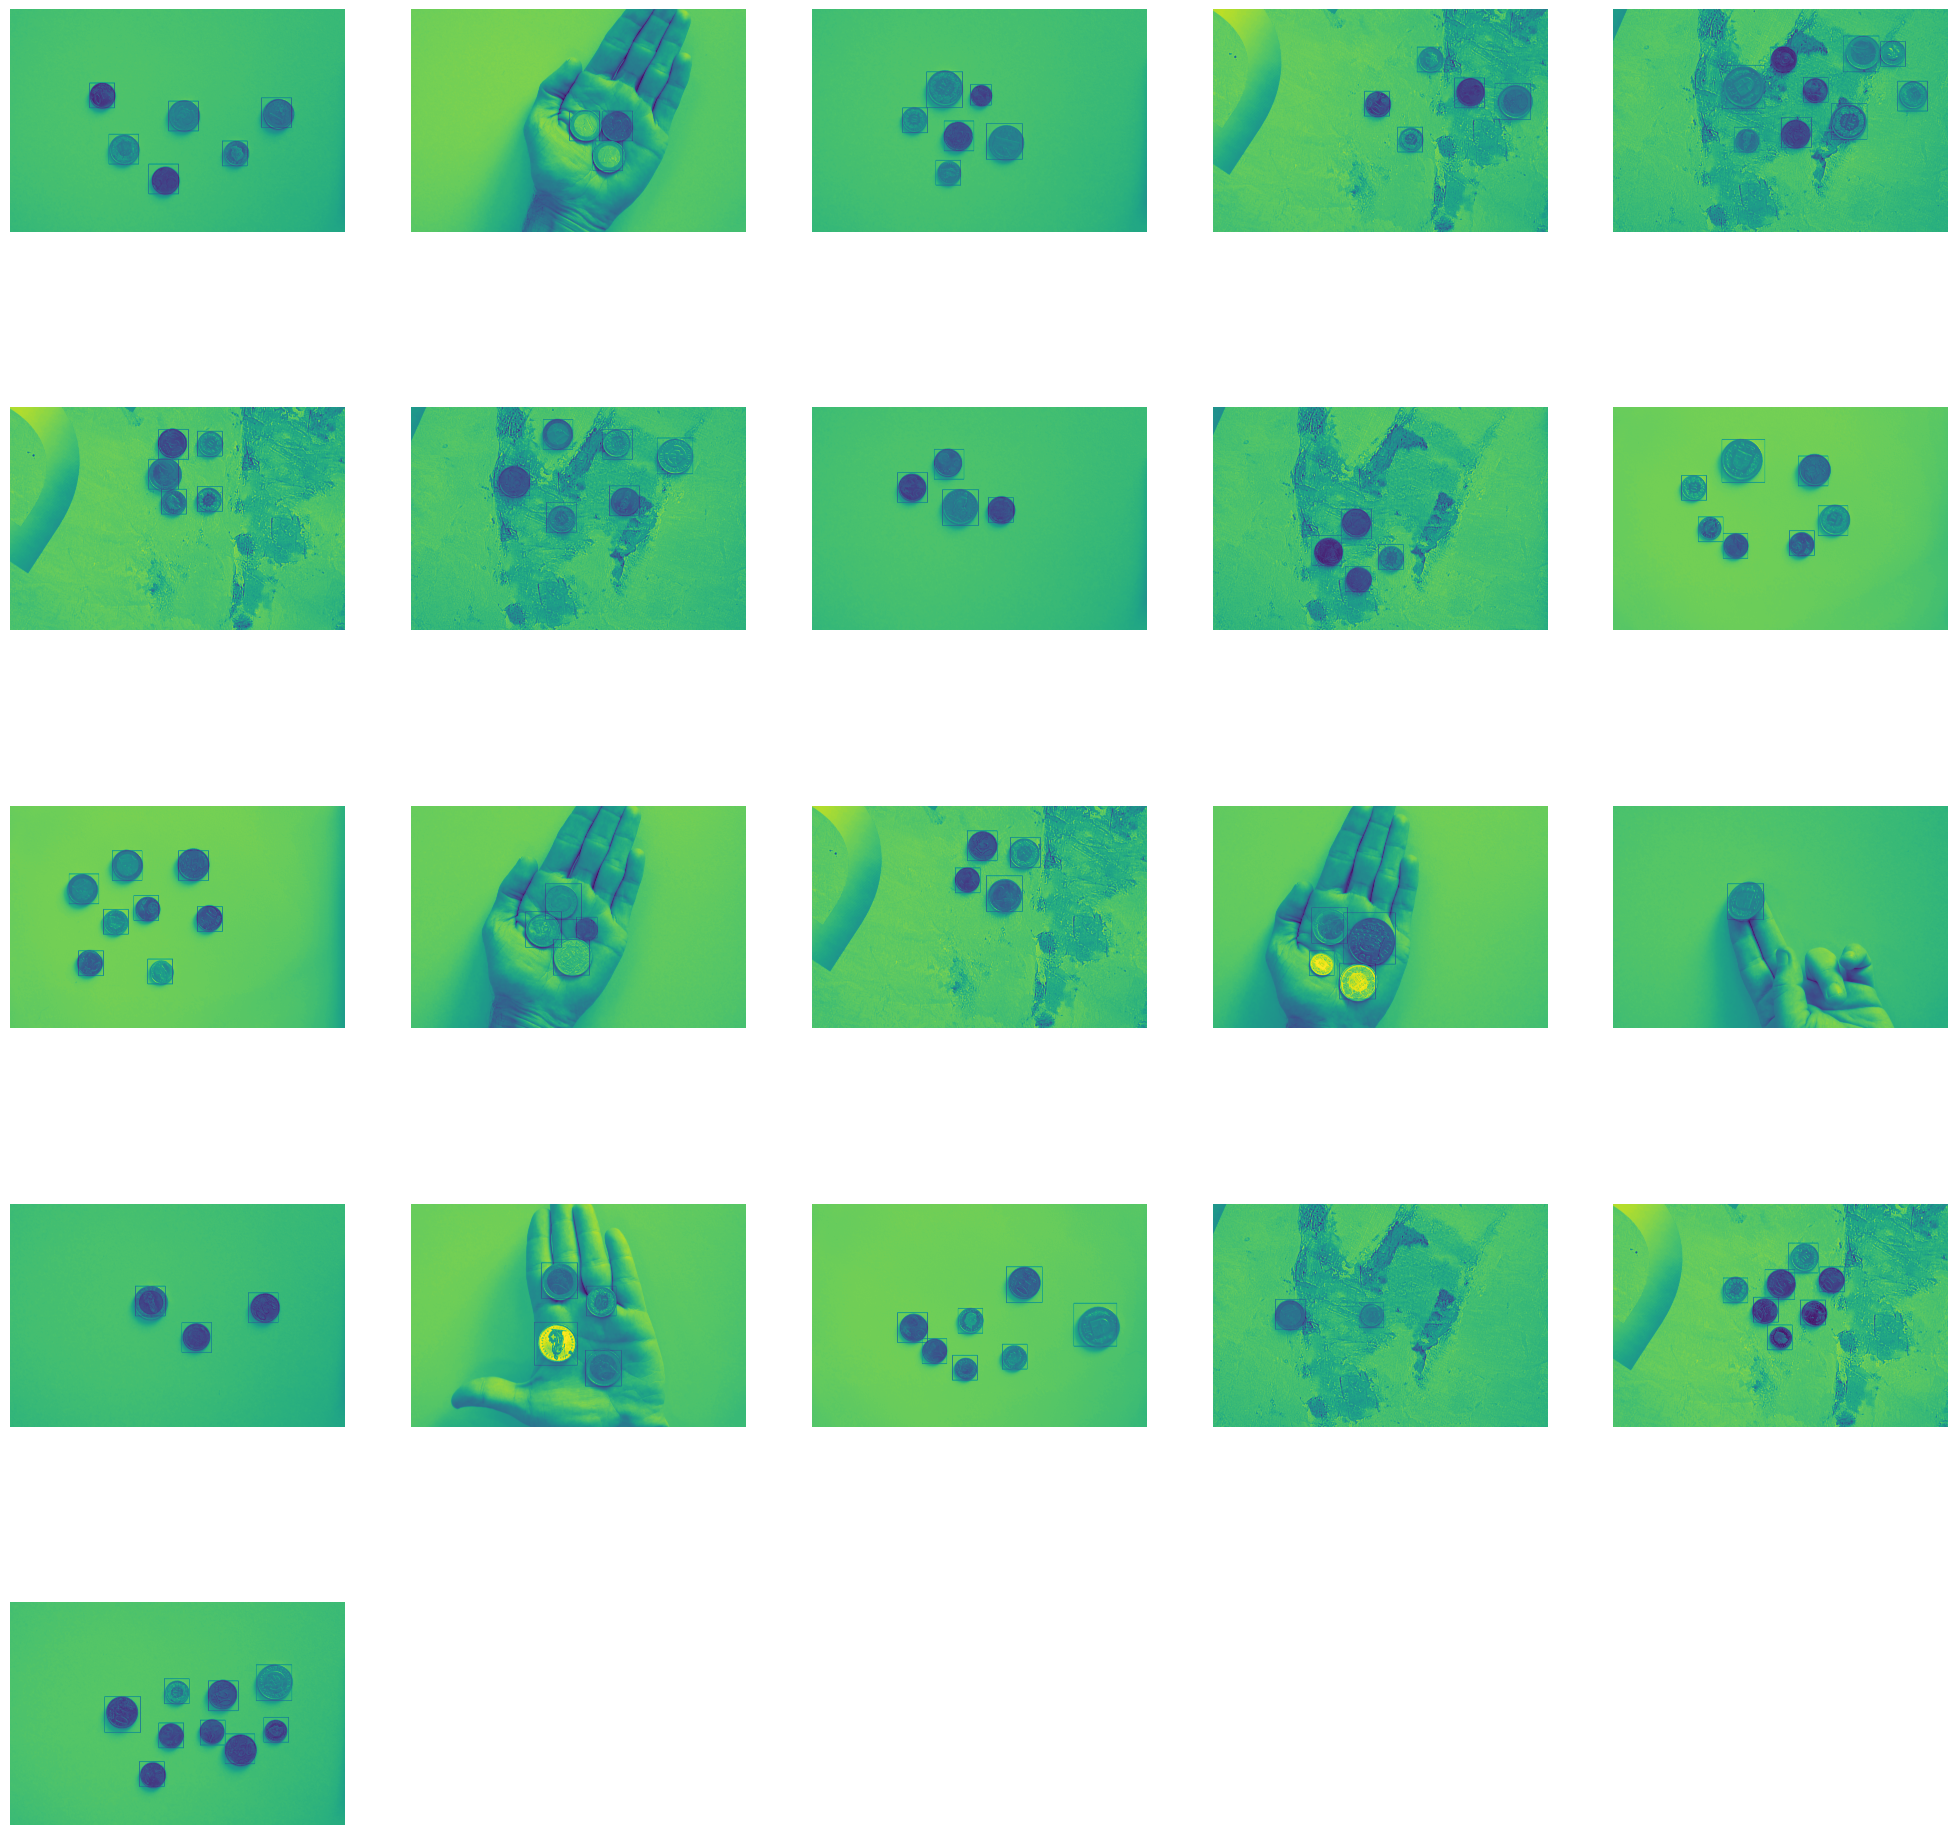

In [26]:
import numpy as np
import matplotlib.pyplot as plt
cols = 5

# Given the number of samples to display, what's the number of rows required.
rows = int(np.ceil(len(test_sets) / cols))

# Set the figure size
plt.figure(figsize=(cols*cols, rows*cols))

#Loop for each class
for i, detect in enumerate(detector_test):
        left = []
        right = []
        top = []
        bottom = []
        # Extract the bonding box coordinates
        for box in detect:
                d_box = box
                #left, top, right,bottom = d_box.left(), d_box.top(), d_box.right(), d_box.bottom()
                left.append(d_box.left())
                top.append(d_box.top())
                right.append(d_box.right())
                bottom.append(d_box.bottom())
        
        # Get the image
        image = test_sets[i]
        
        # Draw reectangle on the detected hand
        for l, t, r, b in zip(left, top, right, bottom):
                cv2.rectangle(image, (l, t), (r, b), (0, 255, 0), 3)
        
        #plt.imshow(image)
        # Display the image
        plt.subplot(rows,cols,i+1);plt.imshow(image[:,:,::5]);plt.axis('off');

In [29]:
test_sets = im_total[141:162]

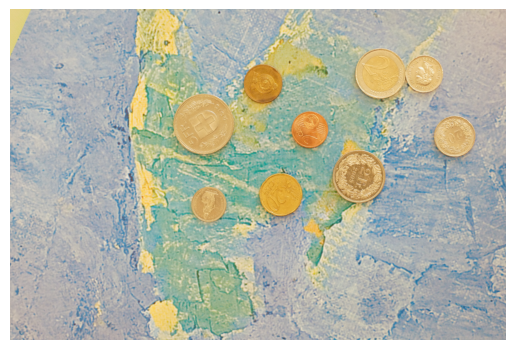

In [37]:
# Convert the color from BGR to RGB
img_rgb = cv2.cvtColor(test_sets[4], cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axes
plt.show()

[[[227 210 141]
  [227 210 141]
  [226 209 140]
  ...
  [196 179 163]
  [190 172 158]
  [201 183 169]]

 [[229 212 143]
  [228 211 142]
  [226 209 140]
  ...
  [200 183 167]
  [199 182 166]
  [209 192 176]]

 [[231 214 145]
  [230 213 144]
  [227 210 140]
  ...
  [202 185 169]
  [207 190 174]
  [213 196 180]]

 ...

 [[184 181 174]
  [182 179 172]
  [183 180 173]
  ...
  [161 160 166]
  [166 164 169]
  [157 155 160]]

 [[181 178 171]
  [182 179 172]
  [186 183 176]
  ...
  [167 166 172]
  [166 164 169]
  [159 157 162]]

 [[177 174 167]
  [182 179 172]
  [190 187 180]
  ...
  [168 167 173]
  [168 166 171]
  [161 159 164]]]


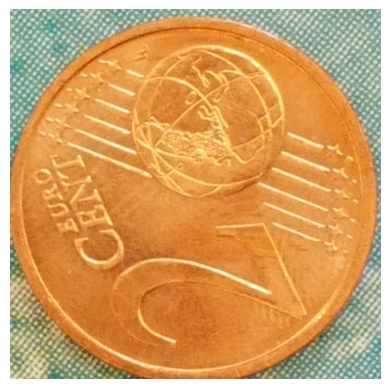

In [43]:
d_box = detector_test[4][0]
coin = img_rgb[d_box.top():d_box.bottom(), d_box.left():d_box.right()]

# Display the ROI using Matplotlib
plt.imshow(coin)
plt.axis('off')  # Hide the axes
plt.show()


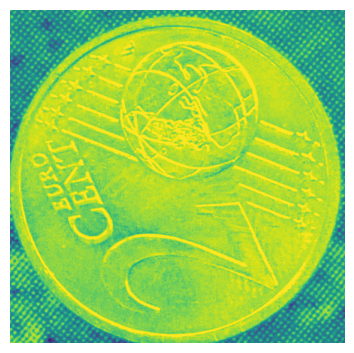

Label for sub-image 1: 2euros


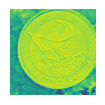

Label for sub-image 2: 2euros


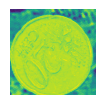

Label for sub-image 3: 20cent


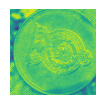

Label for sub-image 4: ood


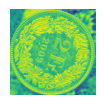

Label for sub-image 5: 2fr


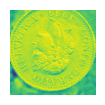

Label for sub-image 6: ood


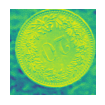

Label for sub-image 7: 20centchf


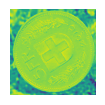

Label for sub-image 8: 5chf


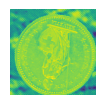

Label for sub-image 9: 1chf


In [59]:
cols = 5

# Given the number of samples to display, what's the number of rows required.
rows = int(np.ceil(len(detector_test[4]) / cols))
# Set the figure size
plt.figure(figsize=(cols*cols, rows*cols))
img_rgb = []
label_total = []
for i, detect_test in enumerate(detector_test[4]):
    img_rgb = cv2.cvtColor(test_sets[4], cv2.COLOR_BGR2RGB)
    d_box = detect_test
    coin = img_rgb[d_box.top():d_box.bottom(), d_box.left():d_box.right()]

    plt.subplot(rows,cols,i+1);plt.imshow(coin[:,:,::5]);plt.axis('off');plt.show();
    
    label = input(f'Enter label for sub-image {i+1}: ')
    label_total.append(label)

    # You can save the label or use it as needed
    print(f'Label for sub-image {i+1}: {label}')

